In [155]:
# !pip show scikit-learn
# !pip install --upgrade scikit-learn
# !pip install seaborn

In [156]:
import pandas as pd
train = pd.read_csv('train.csv')
train.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

In [158]:
train.shape
train = train.drop(columns=['ID'])

In [159]:
train[train == '?'] = np.nan  # Replace '?' with NaN for missing data
train.isna().sum()

A1_Score             0
A2_Score             0
A3_Score             0
A4_Score             0
A5_Score             0
A6_Score             0
A7_Score             0
A8_Score             0
A9_Score             0
A10_Score            0
age                  0
gender               0
ethnicity          203
jaundice             0
austim               0
contry_of_res        0
used_app_before      0
result               0
age_desc             0
relation            40
Class/ASD            0
dtype: int64

Box plots for different Attributes


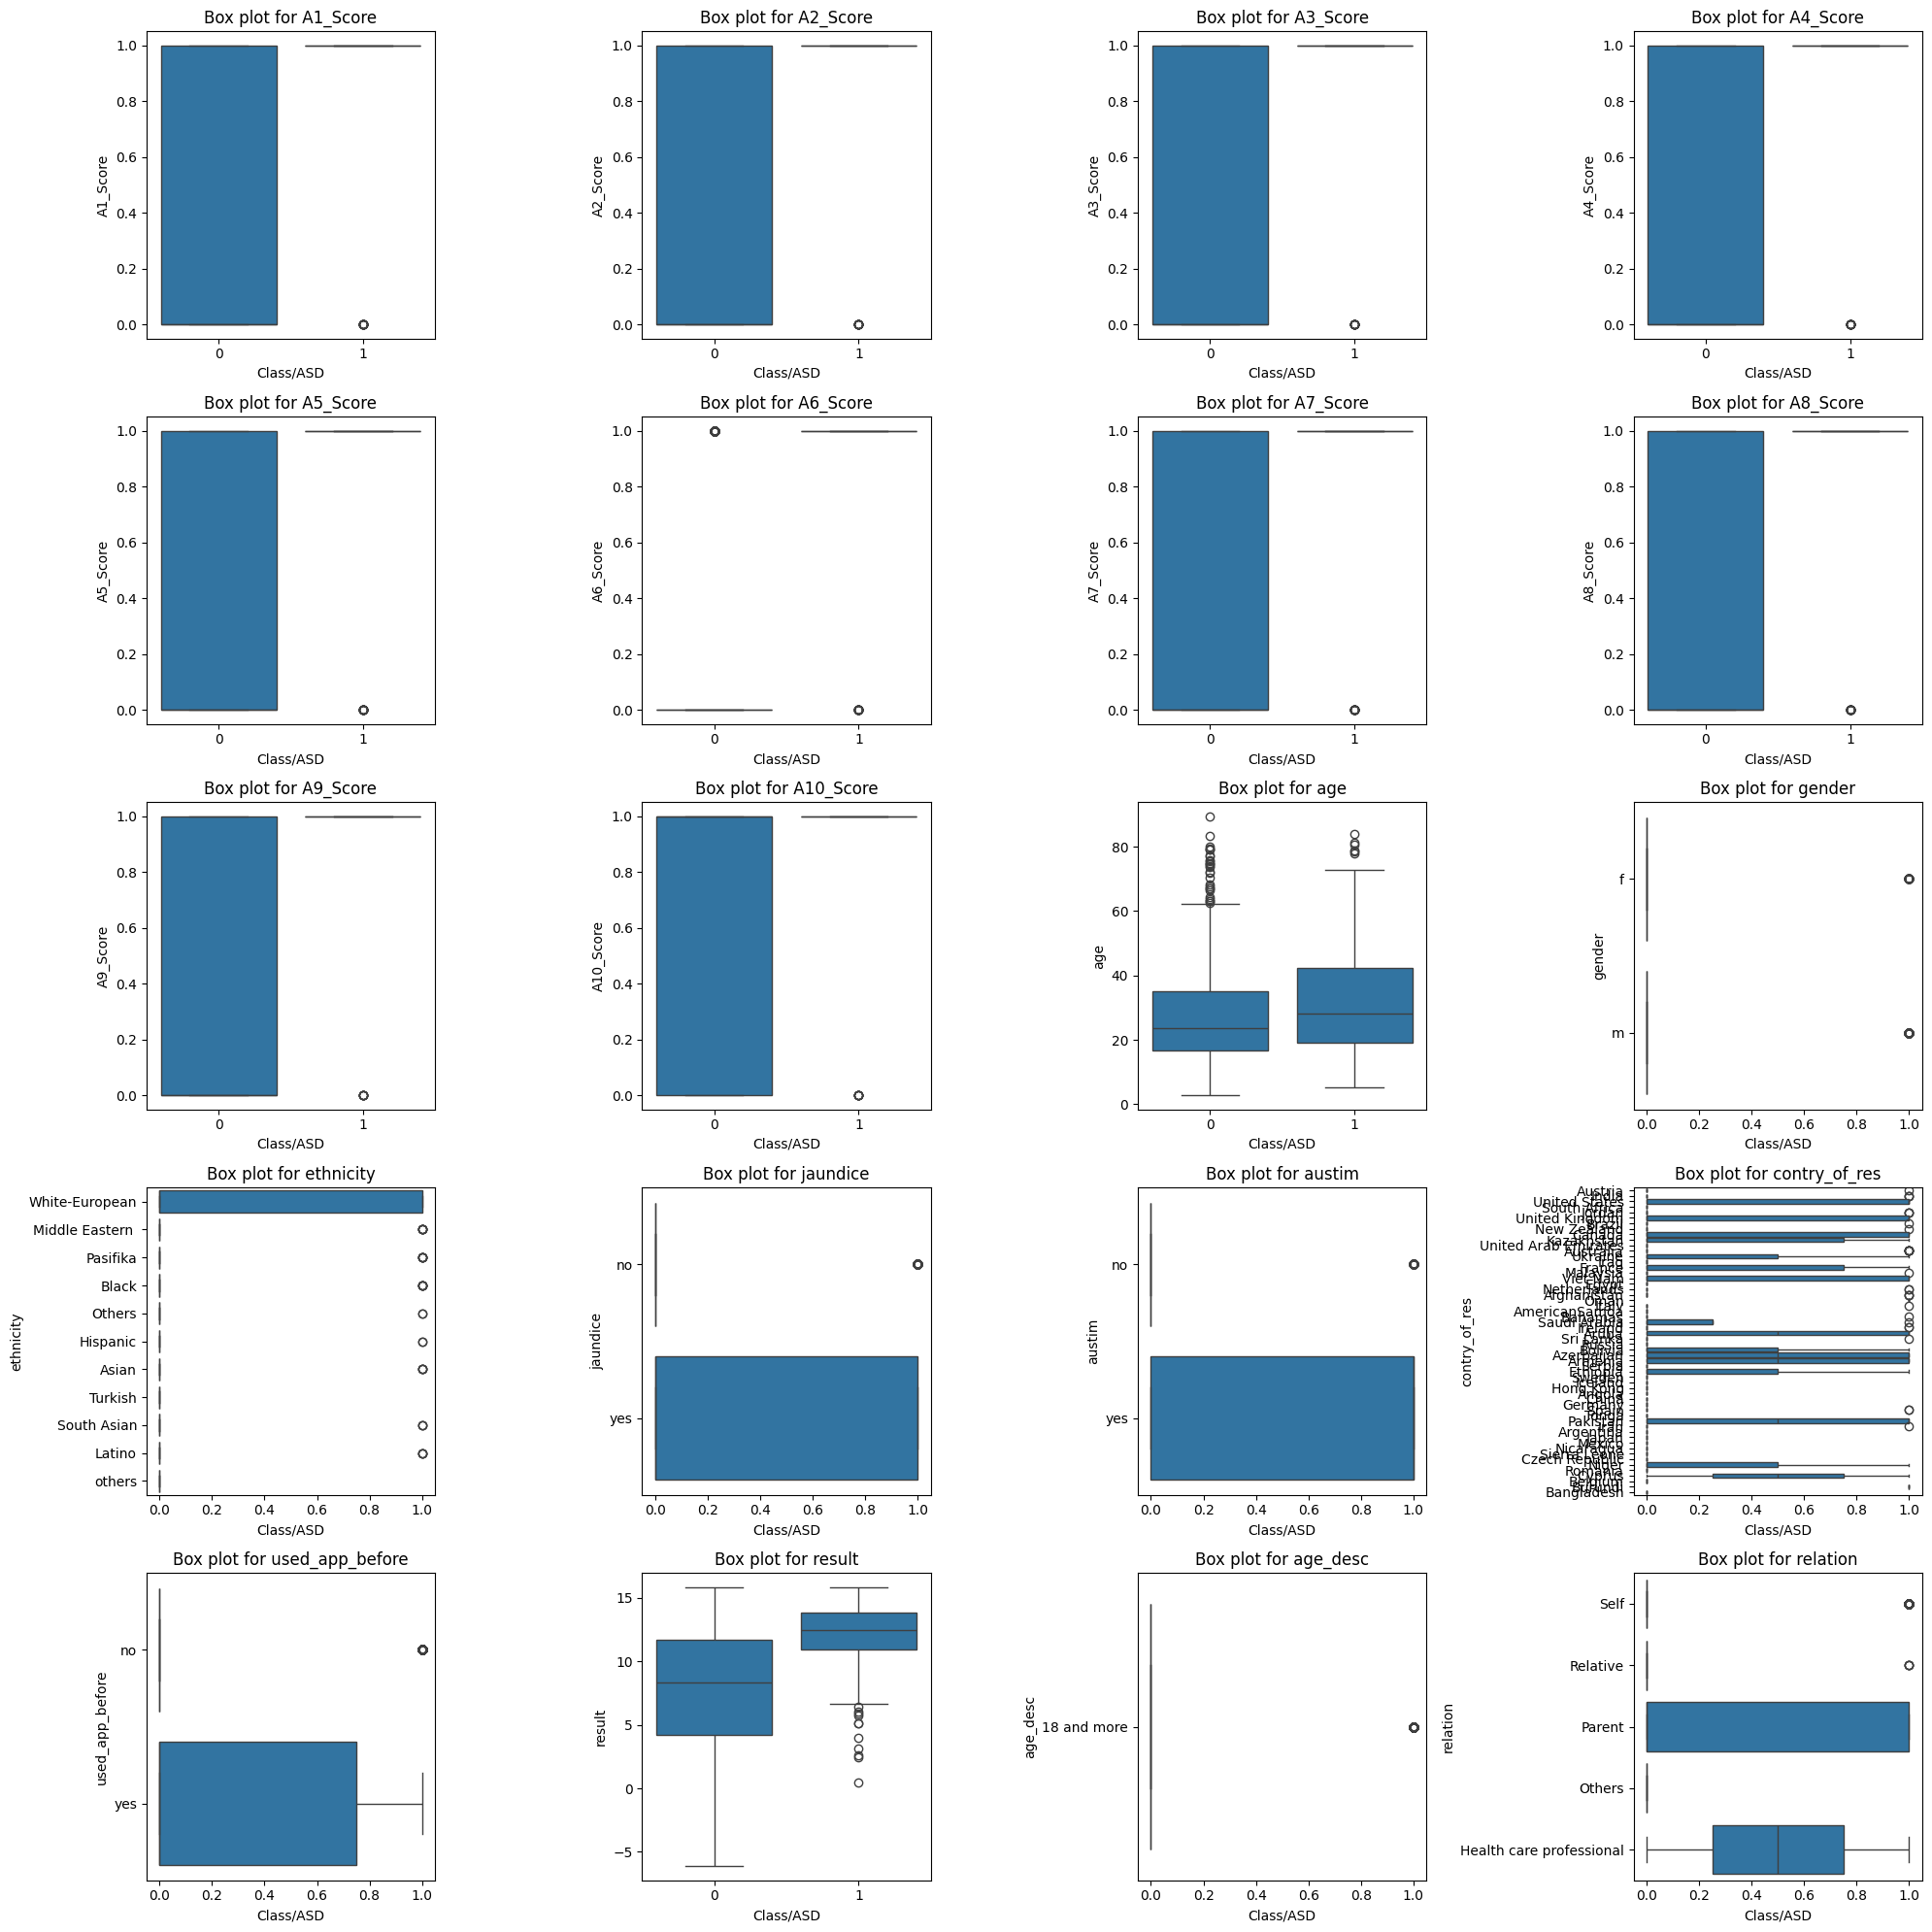

In [160]:
import seaborn as sns
# Create a figure with subplots
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))

# Flatten the 2D array of subplots into a 1D array
axes = axes.flatten()

# Columns to plot (excluding the last column 'Class/ASD')
columns_to_plot = train.columns[:-1]

# Loop through each column and create a box plot
for i, column in enumerate(columns_to_plot):
    sns.boxplot(x='Class/ASD', y=column, data=train, ax=axes[i])
    axes[i].set_title(f'Box plot for {column}')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [161]:
train = train.drop(columns=['relation'])
train = train.drop(columns=['ethnicity'])
train = train.drop(columns=['age_desc'])
train = train.drop(columns=['used_app_before'])
print(train.dtypes)

A1_Score           int64
A2_Score           int64
A3_Score           int64
A4_Score           int64
A5_Score           int64
A6_Score           int64
A7_Score           int64
A8_Score           int64
A9_Score           int64
A10_Score          int64
age              float64
gender            object
jaundice          object
austim            object
contry_of_res     object
result           float64
Class/ASD          int64
dtype: object


Label Encoding


In [162]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# for col in train.columns:
#     # print(f"Processing column: {col}")
#     train.loc[:, col] = le.fit_transform(train[col])
# for col in train.columns:
#     print(f"Column: {col}")
#     print(f"Unique values: {train[col].unique()}")
#     print("=" * 50)



In [163]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


for col in train.columns:
    train.loc[:, col] = le.fit_transform(train[col])

# Convert all columns to int64
train = train.astype('int64')

# Check the data types after transformation
print(train.dtypes)




A1_Score         int64
A2_Score         int64
A3_Score         int64
A4_Score         int64
A5_Score         int64
A6_Score         int64
A7_Score         int64
A8_Score         int64
A9_Score         int64
A10_Score        int64
age              int64
gender           int64
jaundice         int64
austim           int64
contry_of_res    int64
result           int64
Class/ASD        int64
dtype: object


In [164]:
from scipy import stats
from sklearn.impute import SimpleImputer

# Step 1: Remove outliers in 'age'
z_scores_age = np.abs(stats.zscore(train['age']))
train = train[(z_scores_age < 3)]  # Adjust the threshold as needed
train.head()


# Now, train_no_outliers should be ready for further processing or modeling


,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jaundice,austim,contry_of_res,result,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,620,0,0,0,7,246,0
1,0,0,0,0,0,0,0,0,0,0,699,1,0,0,25,108,0
2,1,1,1,1,1,1,1,1,1,1,26,1,0,1,54,774,1
3,0,0,0,0,0,0,0,0,0,0,373,0,0,0,54,109,0
4,0,0,0,0,0,0,0,0,0,0,664,1,0,0,46,3,0


In [165]:
from sklearn.model_selection import train_test_split

X = train.drop(columns=['Class/ASD'])
y = train['Class/ASD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jaundice,austim,contry_of_res,result
264,1,1,1,1,1,1,1,1,1,1,790,1,0,1,15,597
615,0,0,0,0,0,0,1,1,0,0,57,1,0,0,36,609
329,1,0,0,0,0,0,0,0,0,0,542,1,0,0,31,201
342,0,0,0,0,0,0,0,0,0,0,504,1,0,0,52,323
394,1,1,0,1,0,0,0,0,1,1,513,0,0,0,15,722


In [166]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


NaiveBayes

In [183]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
model =   GauNB()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.83125


Cross validation using GaussianNB

In [168]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Naive Bayes model
model = GaussianNB()


# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Print the mean and standard deviation of the scores
print("Mean CV Score:", np.mean(cv_scores))
print("Standard Deviation of CV Scores:", np.std(cv_scores))


Cross-Validation Scores: [0.7875  0.81875 0.85    0.84375 0.875  ]
Mean CV Score: 0.835
Standard Deviation of CV Scores: 0.029738443133425805


In [169]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming you have your feature matrix X and target variable y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gaussian Naive Bayes model
model = GaussianNB()

# Define the hyperparameters and their possible values
param_grid = {}  # Gaussian Naive Bayes doesn't have hyperparameters

# Create the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Fit the model to the data
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with Best Model: {accuracy}')



Accuracy with Best Model: 0.83125


In [170]:
from sklearn.metrics import confusion_matrix

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)



Confusion Matrix:
[[103  21]
 [  6  30]]


In [171]:
from sklearn.metrics import classification_report

# Classification report
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.83      0.88       124
           1       0.59      0.83      0.69        36

    accuracy                           0.83       160
   macro avg       0.77      0.83      0.79       160
weighted avg       0.86      0.83      0.84       160



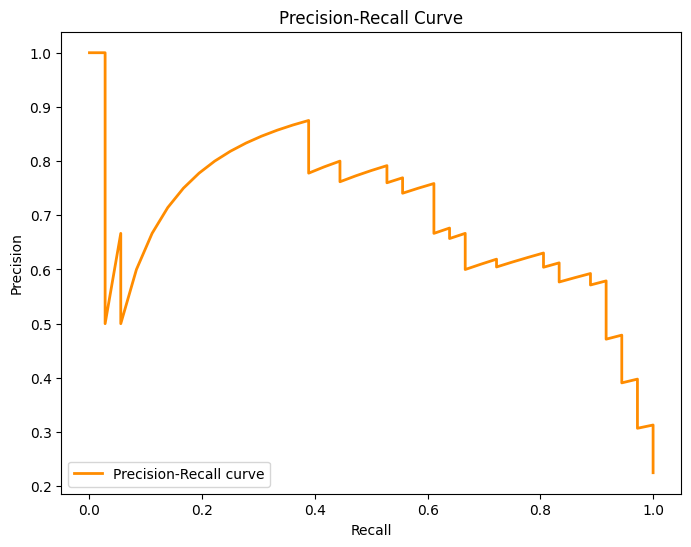

In [172]:
from sklearn.metrics import precision_recall_curve

# Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, best_model.predict_proba(X_test)[:, 1])

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()


Random Forest Classifier

In [173]:
from sklearn.ensemble import RandomForestClassifier
classifier= RandomForestClassifier(n_estimators= 29, criterion="entropy")
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=29)

In [174]:
y_pred= classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with Best Model: {accuracy}')

Accuracy with Best Model: 0.85


In [175]:
cm= confusion_matrix(y_test, y_pred)
cm

array([[116,   8],
       [ 16,  20]], dtype=int64)

In [176]:
from sklearn.metrics import classification_report

# Classification report
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       124
           1       0.71      0.56      0.63        36

    accuracy                           0.85       160
   macro avg       0.80      0.75      0.77       160
weighted avg       0.84      0.85      0.84       160



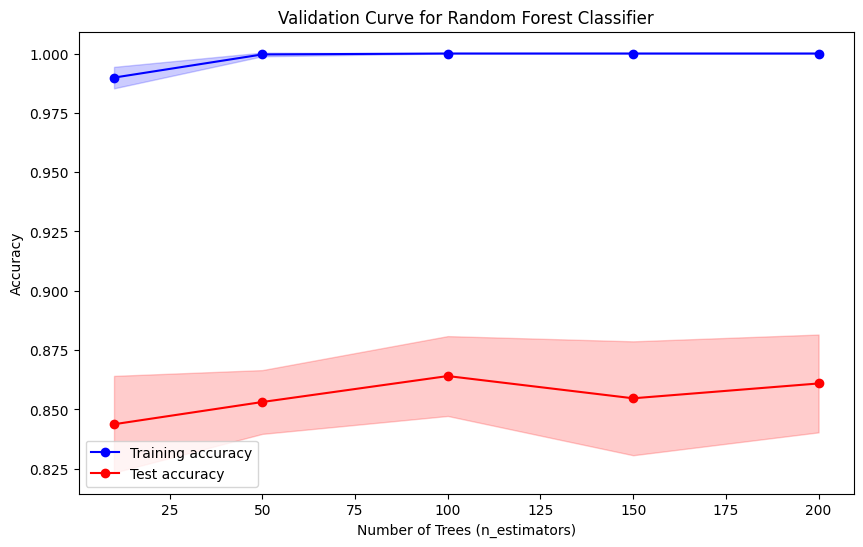

In [177]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameter values 
# param_range = [10, 50, 100, 150, 200] 


# Create a Random Forest Classifier model
model = RandomForestClassifier()

# Calculate validation scores using validation_curve
train_scores, test_scores = validation_curve(
    model, X_train, y_train, param_name="n_estimators", param_range=param_range,
    cv=5, scoring="accuracy", n_jobs=-1
)

# Calculate mean and standard deviation for training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot validation curve for both training and test accuracy
plt.figure(figsize=(10, 6))

plt.plot(param_range, train_mean, label="Training accuracy", color="blue", marker="o")
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.2, color="blue")

plt.plot(param_range, test_mean, label="Test accuracy", color="red", marker="o")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.2, color="red")

plt.title("Validation Curve for Random Forest Classifier")
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.show()


SVM Algorithm

In [178]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state=42)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [179]:
#Predicting the test set result
y_pred= classifier.predict(X_test)

In [180]:
#Creating the Confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)
cm

array([[114,  10],
       [ 12,  24]], dtype=int64)

In [181]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with Best Model: {accuracy}')

Accuracy with Best Model: 0.8625
